In [ ]:
!wget https://hf.co/danjacobellis/walloc/resolve/main/RGB_16x.pth

In [ ]:
!wget https://hf.co/danjacobellis/walloc/resolve/main/RGB_16x.json

In [ ]:
!wget https://hf.co/danjacobellis/walloc/resolve/main/RGB_4x.pth

In [ ]:
!wget https://hf.co/danjacobellis/walloc/resolve/main/RGB_4x.json

In [1]:
import os
import torch
import json
import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
from PIL import Image, ImageEnhance
from IPython.display import display
from torchvision.transforms import ToPILImage, PILToTensor
from walloc import walloc
from walloc.walloc import latent_to_pil, pil_to_latent

In [2]:
device = "cpu"
codec_config = SimpleNamespace(**json.load(open("RGB_16x.json")))
checkpoint = torch.load("RGB_16x.pth",map_location="cpu",weights_only=False)
codec = walloc.Codec2D(
    channels = codec_config.channels,
    J = codec_config.J,
    Ne = codec_config.Ne,
    Nd = codec_config.Nd,
    latent_dim = codec_config.latent_dim,
    latent_bits = codec_config.latent_bits,
    lightweight_encode = codec_config.lightweight_encode
)
codec.load_state_dict(checkpoint['model_state_dict'])
codec = codec.to(device)
codec.eval();

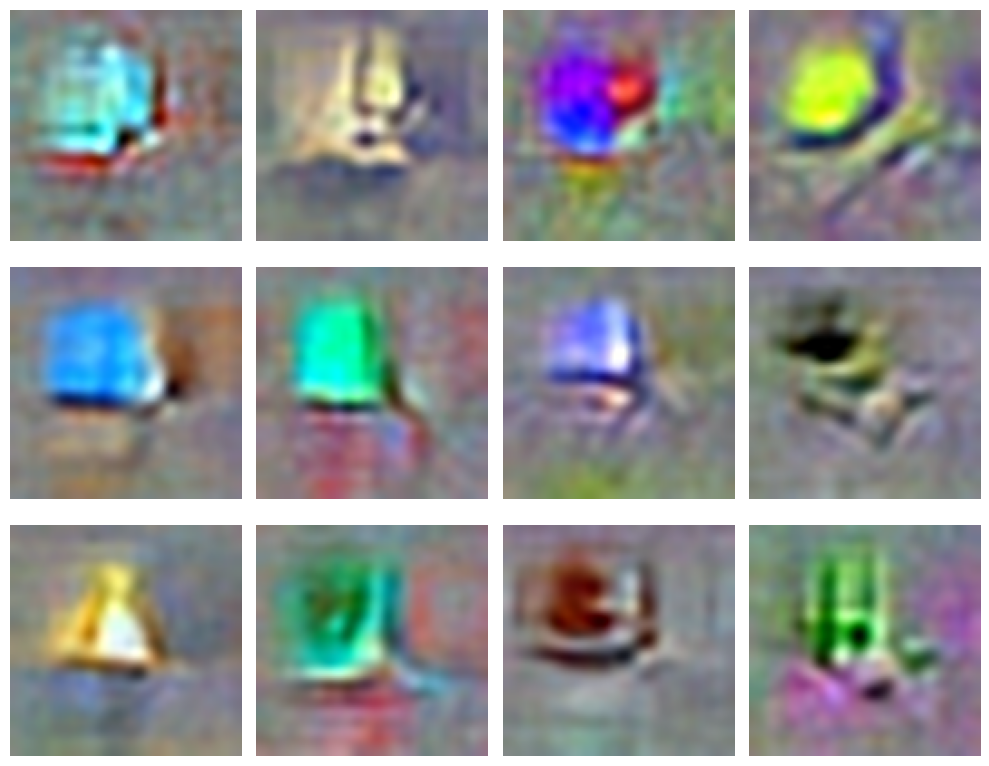

In [3]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

fig, axs = plt.subplots(3, 4, figsize=(10, 8))

with torch.no_grad():
    for i_channel in range(12):
        z = torch.zeros((1, 12, 3, 3), dtype=torch.float32)
        z[0, i_channel, 1, 1] = 31
        X_hat = codec.decoder(z)
        x_hat = codec.wavelet_synthesis(X_hat, codec.J)
        x_hat = codec.clamp(x_hat)
        img = ToPILImage()(x_hat[0] + 0.5).resize((128, 128), resample=Image.Resampling.LANCZOS)

        row, col = divmod(i_channel, 4)
        axs[row, col].imshow(img)
        axs[row, col].axis('off')  # Hide axis

plt.tight_layout();
fig.savefig("12c.svg")

In [4]:
device = "cpu"
codec_config = SimpleNamespace(**json.load(open("RGB_4x.json")))
checkpoint = torch.load("RGB_4x.pth",map_location="cpu",weights_only=False)
codec = walloc.Codec2D(
    channels = codec_config.channels,
    J = codec_config.J,
    Ne = codec_config.Ne,
    Nd = codec_config.Nd,
    latent_dim = codec_config.latent_dim,
    latent_bits = codec_config.latent_bits,
    lightweight_encode = codec_config.lightweight_encode
)
codec.load_state_dict(checkpoint['model_state_dict'])
codec = codec.to(device)
codec.eval();

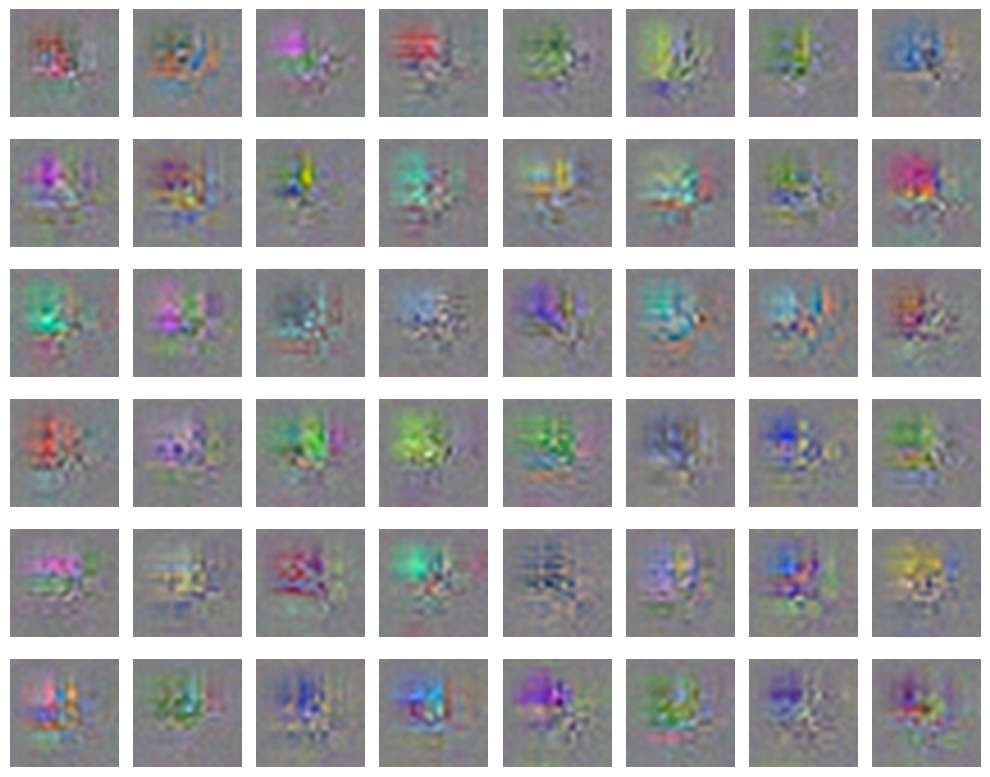

In [5]:
fig, axs = plt.subplots(6, 8, figsize=(10, 8))

with torch.no_grad():
    for i_channel in range(48):
        z = torch.zeros((1, 48, 3, 3), dtype=torch.float32)  # Adjust the latent dimension to 48
        z[0, i_channel, 1, 1] = 31
        X_hat = codec.decoder(z)
        x_hat = codec.wavelet_synthesis(X_hat, codec.J)
        x_hat = codec.clamp(x_hat)
        img = ToPILImage()(x_hat[0] + 0.5).resize((128, 128), resample=Image.Resampling.LANCZOS)

        row, col = divmod(i_channel, 8)  # Adjust for 8 columns
        axs[row, col].imshow(img)
        axs[row, col].axis('off')  # Hide axis

plt.tight_layout();
fig.savefig("48c.svg")